In [1]:
import numpy as np
import tensorflow as tf

In [6]:
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.3,horizontal_flip=True, vertical_flip=True
                                                              ,shear_range=0.2,rotation_range=10,width_shift_range=0.2,
                                                             height_shift_range=0.1,rescale=1/255) # rescaled in 0 and 1 value
# Search for other kinds of flips on google (using image data generator) (# shear means tilted image)

In [3]:
# Making training dataset
train_data=data_generator.flow_from_directory(r'train\train',class_mode='binary',target_size=(150,150),batch_size=25)

Found 1313 images belonging to 2 classes.


In [4]:
data_generator_testing = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [5]:
test_data=data_generator_testing.flow_from_directory(r'test\test',class_mode='binary',target_size=(150,150),batch_size=25)

Found 194 images belonging to 2 classes.


In [6]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(40,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(tf.keras.layers.Conv2D(80,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
          
model.add(tf.keras.layers.Conv2D(120,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
          
model.add(tf.keras.layers.Flatten())
          
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))   # units =1 for probability answer bwtween 0 and 1
          
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.fit(train_data,validation_data=test_data,epochs=10)

Epoch 1/10


53/53 [==============================] - 77s 1s/step - loss: 0.5799 - accuracy: 0.7022 - val_loss: 0.2508 - val_accuracy: 0.8763
Epoch 2/10
53/53 [==============================] - 72s 1s/step - loss: 0.2593 - accuracy: 0.9002 - val_loss: 0.0907 - val_accuracy: 0.9588
Epoch 3/10
53/53 [==============================] - 72s 1s/step - loss: 0.2165 - accuracy: 0.9200 - val_loss: 0.1072 - val_accuracy: 0.9588
Epoch 4/10
53/53 [==============================] - 71s 1s/step - loss: 0.1911 - accuracy: 0.9299 - val_loss: 0.0604 - val_accuracy: 0.9845
Epoch 5/10
53/53 [==============================] - 72s 1s/step - loss: 0.2175 - accuracy: 0.9193 - val_loss: 0.3014 - val_accuracy: 0.8711
Epoch 6/10
53/53 [==============================] - 74s 1s/step - loss: 0.2355 - accuracy: 0.9132 - val_loss: 0.0654 - val_accuracy: 0.9794
Epoch 7/10
53/53 [==============================] - 74s 1s/step - loss: 0.1815 - accuracy: 0.9299 - val_loss: 0.0675 - val_accuracy: 0.9897
Epoch 8/10
53/53 [

In [22]:
d=model.history.history

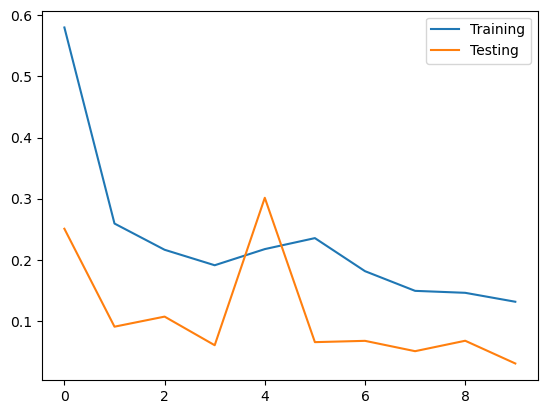

In [29]:
import matplotlib.pyplot as plt
import cv2

plt.plot(d['loss'],label='Training')
plt.plot(d['val_loss'],label='Testing')
plt.legend()

In [30]:
model.save('Face_model.h5')

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import cv2

In [3]:
model=tf.keras.models.load_model('Face_model.h5')

In [4]:
cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [5]:
cap=cv2.VideoCapture(0)

while True:
       _,frame = cap.read()
       faces = cascade.detectMultiScale(frame,scaleFactor=1.1)
       for x,y,w,h in faces:
           face=frame[y:y+h,x:x+w]
           cv2.imwrite("face.jpg",face)
           face = tf.keras.preprocessing.image.load_img("face.jpg",target_size=(150,150,3))#Convert to  numpy
           face = tf.keras.preprocessing.image.img_to_array(face)
           face = np.expand_dims(face,axis=0) #Convert into 4d
           pred = model.predict(face)
           if pred>0.5:
               cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),3)
               cv2.putText(frame,"No mask", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
           else:
               cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)
               cv2.putText(frame,"Mask", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
       cv2.imshow("window",frame)
       if cv2.waitKey(1)==ord('q'):
           break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step
